# An analysis of a mobile service provider's tariffs

## Data overview

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from functools import reduce
from scipy.stats import levene

In [2]:
# reading csv files and assigning the results to variables
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv', sep = ',')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv', sep = ',', index_col=0)
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv', sep = ',')
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv', sep = ',')
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv', sep = ',')

In [3]:
# printing the head of the DataFrame
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
# printing information about the DataFrame
calls.info()

# computing a summary of statistics
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


- Need to convert the call_date column type to datetime.

In [5]:
# printing the head of the DataFrame
internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [6]:
# printing information about the DataFrame
internet.info()

# computing a summary of statistics
internet.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


- Need to convert the session_date column type to datetime.

In [7]:
# printing the head of the DataFrame
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [8]:
# printing information about the DataFrame
messages.info()

# computing a summary of statistics
messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


- Need to convert the message_date column type to datetime.

In [9]:
# printing the head of the DataFrame
tariffs.head(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
# printing information about the DataFrame
tariffs.info()

# computing a summary of statistics
tariffs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 208.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


- Looks good.

In [11]:
# printing the head of the DataFrame
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [12]:
# printing information about the DataFrame
users.info()

# computing a summary of statistics
users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


- Need to convert the reg_date column type to datetime;
- There are missing values in the churn_date column. 

**Conclusion**

- Convert data to datetime in the following tables: `calls` (column `call_date`), `internet` (column `service_date`), `messages` (column `message_date`), `users` (column `reg_date`);
- `Churn_date` columns in users table have missing values indicating that the tariff was still in effect. The missing values will probably left as they are.

## Data preprocessing

- Convert the data type to datetime.
- Calculate for each user:
    - monthly calls made and minutes spent;
    - monthly messages sent;
    - monthly traffic used;
    - monthly revenue from each user.

In [13]:
# converting the data type to datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%dT%H:%M:%S')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%dT%H:%M:%S')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%dT%H:%M:%S')
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%dT%H:%M:%S')

In [14]:
# rounding up calls duration
calls['duration'] = np.ceil(calls['duration'])

In [15]:
# adding a "month" column to each table
calls['month'] = calls['call_date'].astype('datetime64[M]')
internet['month'] = internet['session_date'].astype('datetime64[M]')
messages['month'] = messages['message_date'].astype('datetime64[M]')
users['month'] = users['reg_date'].astype('datetime64[M]')

**Monthly calls made and minutes spent**

In [16]:
# creating a calls_pivot table using the pivot method
# grouping by user_id and month and counting monthly calls made and minutes spent
calls_pivot = calls.pivot_table(index = ['user_id', 'month'], aggfunc = {'call_date': 'count', 'duration': 'sum'})

# renaming the columns
calls_pivot.columns = ['calls_count', 'calls_duration']

# displaying
calls_pivot.head()

calls_count  calls_duration
user_id month                                  
1000    2018-05-01           22           159.0
        2018-06-01           43           172.0
        2018-07-01           47           340.0
        2018-08-01           52           408.0
        2018-09-01           58           466.0

**Monthly messages sent**

In [17]:
# creating messages_pivot table using the pivot method 
# grouping by user_id and month and counting monthly messages sent
messages_pivot = messages.pivot_table(index = ['user_id', 'month'], aggfunc = {'id': 'count'})

# renaming the column
messages_pivot.columns = ['messages_count']

# displaying
messages_pivot.head(10)

messages_count
user_id month                     
1000    2018-05-01              22
        2018-06-01              60
        2018-07-01              75
        2018-08-01              81
        2018-09-01              57
        2018-10-01              73
        2018-11-01              58
        2018-12-01              70
1002    2018-06-01               4
        2018-07-01              11

**Monthly traffic used**

In [18]:
# creating an internet_pivot table using the pivot method 
# grouping by user_id and month and calculating monthly traffic used
internet_pivot = internet.pivot_table(index = ['user_id', 'month'], aggfunc = {'mb_used': 'sum'})

# renaming the column
internet_pivot.columns = ['traffic_volume']

# converting traffic from mb to gb
internet_pivot['traffic_volume'] = internet_pivot['traffic_volume'] / 1024

# rounding up traffic
internet_pivot['traffic_volume'] = np.ceil(internet_pivot['traffic_volume'])

# displaying
internet_pivot.head(10)

traffic_volume
user_id month                     
1000    2018-05-01             3.0
        2018-06-01            23.0
        2018-07-01            14.0
        2018-08-01            14.0
        2018-09-01            15.0
        2018-10-01            15.0
        2018-11-01            15.0
        2018-12-01            10.0
1001    2018-11-01            18.0
        2018-12-01            14.0

**Monthly revenue per user**

In [19]:
# merging tables calls_pivot, messages_pivot, internet_pivot
data_frames = [calls_pivot, messages_pivot, internet_pivot]
cmi = reduce(lambda left, right: pd.merge(left, right,on = ['user_id', 'month'], how = 'outer'), data_frames)

In [20]:
# merging users and cmi tables on user_id and month
cmiu = cmi.merge(users, on  = ['user_id', 'month'], how='left')
cmiu.head(10)

,user_id,month,calls_count,calls_duration,messages_count,traffic_volume,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05-01,22.0,159.0,22.0,3.0,52.0,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06-01,43.0,172.0,60.0,23.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,1000,2018-07-01,47.0,340.0,75.0,14.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,1000,2018-08-01,52.0,408.0,81.0,14.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,1000,2018-09-01,58.0,466.0,57.0,15.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
5,1000,2018-10-01,57.0,350.0,73.0,15.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
6,1000,2018-11-01,43.0,338.0,58.0,15.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
7,1000,2018-12-01,46.0,333.0,70.0,10.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN
8,1001,2018-11-01,59.0,430.0,NaN,18.0,41.0,NaN,Москва,Иван,Ежов,2018-11-01,smart
9,1001,2018-12-01,63.0,414.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [21]:
# renaming the tariff_name column to tariff in the tariffs table for merging
tariffs.columns = [
    'messages_included', 
    'mb_per_month_included', 
    'minutes_included', 
    'rub_monthly_fee', 
    'rub_per_gb', 
    'rub_per_message', 
    'rub_per_minute', 
    'tariff'
]

In [22]:
# merging cmiu and tariffs tables on tariff
cmiut = cmiu.merge(tariffs, on='tariff')

In [23]:
# adding gb_per_month_included where converting MB to GB
cmiut['gb_per_month_included'] = cmiut['mb_per_month_included'] / 1024

In [24]:
# making the table easier to navigate by removing useless columns
cmiut = cmiut.drop(['churn_date', 'first_name', 'last_name', 'reg_date', 'mb_per_month_included'], axis='columns')

In [25]:
# checking missing values
cmiut.isnull().sum()

user_id                   0
month                     0
calls_count               7
calls_duration            7
messages_count           85
traffic_volume            4
age                       0
city                      0
tariff                    0
messages_included         0
minutes_included          0
rub_monthly_fee           0
rub_per_gb                0
rub_per_message           0
rub_per_minute            0
gb_per_month_included     0
dtype: int64

Calls_count, calls_duration, messages_count and traffic_volume have missing values due to the difference in the initial data. If we leave the gaps as they are, further calculations will be affected. If we discard, we will lose a lot of data. Therefore, we replace them with 0. 

In [26]:
# replacing the missing values with zero
cmiut = cmiut.fillna(0)

In [27]:
# checking the missing values
cmiut.isnull().sum()

user_id                  0
month                    0
calls_count              0
calls_duration           0
messages_count           0
traffic_volume           0
age                      0
city                     0
tariff                   0
messages_included        0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
gb_per_month_included    0
dtype: int64

In [28]:
# calculating monthly revenue
def total_bill(row):
    
    # define variables
    total_minutes = 0
    total_messages = 0
    total_traffic = 0
    minutes = row['calls_duration']
    messages = row['messages_count']
    traffic = row['traffic_volume']
    tariff_minutes = row['minutes_included']
    tariff_messages = row['messages_included']
    tariff_traffic = row['gb_per_month_included']
    rub_monthly_fee = row['rub_monthly_fee']
    rub_per_minute = row['rub_per_minute']
    rub_per_message = row['rub_per_message']
    rub_per_gb = row['rub_per_gb']

# checking the difference between total minutes, messages, traffic used and tariff limits:
# if the difference is less than the paid limit, then return zero - the client has not exceeded the paid limit
# if the difference is greater than the paid limit - multiply the difference by the cost in excess of the tariff plan

    if minutes < tariff_minutes:
        total_minutes = 0
    if minutes > tariff_minutes:
        total_minutes += (minutes - tariff_minutes) * rub_per_minute
    if messages < tariff_messages:
        total_messages = 0
    if messages > tariff_messages:
        total_messages += (messages - tariff_messages) * rub_per_message
    if traffic < tariff_traffic:
        total_traffic = 0
    if traffic > tariff_traffic:
        total_traffic += (traffic - tariff_traffic) * rub_per_gb
    
    return total_minutes + total_messages + total_traffic + rub_monthly_fee    

In [29]:
# calculating monthly revenue
cmiut['total_bill'] = cmiut.apply(total_bill, axis = 1)
cmiut.head(10)

,user_id,month,calls_count,calls_duration,messages_count,traffic_volume,age,city,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,total_bill
0,1000,2018-05-01,22.0,159.0,22.0,3.0,52.0,Краснодар,ultra,1000,3000,1950,150,1,1,30.0,1950.0
1,1003,2018-08-01,55.0,380.0,37.0,9.0,23.0,Москва,ultra,1000,3000,1950,150,1,1,30.0,1950.0
2,1004,2018-05-01,9.0,35.0,95.0,14.0,68.0,Новокузнецк,ultra,1000,3000,1950,150,1,1,30.0,1950.0
3,1013,2018-11-01,52.0,369.0,17.0,10.0,36.0,Иваново,ultra,1000,3000,1950,150,1,1,30.0,1950.0
4,1016,2018-11-01,4.0,28.0,39.0,8.0,58.0,Омск,ultra,1000,3000,1950,150,1,1,30.0,1950.0
5,1018,2018-04-01,85.0,636.0,34.0,6.0,71.0,Уфа,ultra,1000,3000,1950,150,1,1,30.0,1950.0
6,1019,2018-05-01,37.0,300.0,21.0,11.0,63.0,Томск,ultra,1000,3000,1950,150,1,1,30.0,1950.0
7,1021,2018-04-01,15.0,90.0,13.0,5.0,61.0,Краснодар,ultra,1000,3000,1950,150,1,1,30.0,1950.0
8,1024,2018-10-01,7.0,79.0,0.0,4.0,73.0,Санкт-Петербург,ultra,1000,3000,1950,150,1,1,30.0,1950.0
9,1028,2018-10-01,138.0,954.0,223.0,22.0,20.0,Тверь,ultra,1000,3000,1950,150,1,1,30.0,1950.0


**Conclusion**

- Changed data types to datetime
- Calculated for each user:
    - monthly calls made and minutes spent - calls_pivot;
    - monthly messages sent - messages_pivot;
    - monthly traffic used - internet_pivot;
    - monthly revenue from each user - cmiut['total_bill']

## Data analysis

Describe the users' behavior by calculating:
- minutes, messages, and traffic each tariff's users need per month;
- mean, variance, standard deviation;
- service consumption by user.

**Calculating minutes, messages, and traffic each tariff's users need per month**

In [30]:
# calculating monthly minutes, messages, and traffic for all users of each tariff
tariff_by_month = cmiut.pivot_table(
    index = ['tariff', 'month'], 
    values = ['calls_duration', 'messages_count', 'traffic_volume'],
    aggfunc = 'sum'
).reset_index(level='month')

tariff_by_month

,month,calls_duration,messages_count,traffic_volume
tariff,,,,
smart,2018-01-01,6931.0,620.0,297.0
smart,2018-02-01,4035.0,312.0,173.0
smart,2018-03-01,5046.0,400.0,195.0
smart,2018-04-01,8096.0,739.0,286.0
smart,2018-05-01,5658.0,514.0,282.0
smart,2018-06-01,4275.0,314.0,198.0
smart,2018-07-01,8921.0,671.0,341.0
smart,2018-08-01,7246.0,577.0,339.0
smart,2018-09-01,6814.0,549.0,247.0


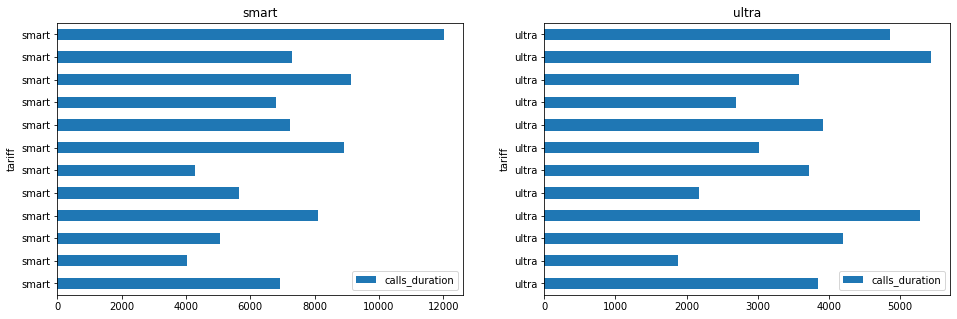

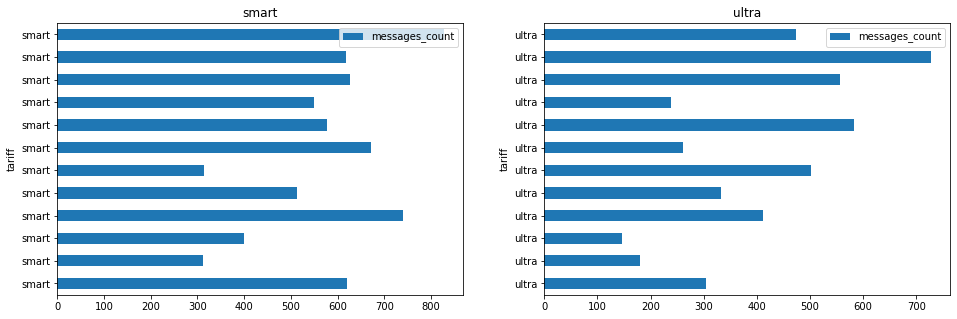

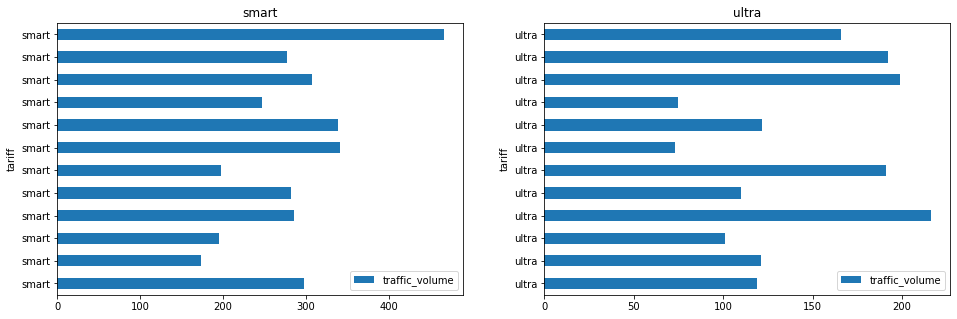

In [31]:
# visualising monthly distribution of minutes, messages, and traffic for each tariff
for i in ['calls_duration', 'messages_count', 'traffic_volume']:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    tariff_by_month[tariff_by_month.index == 'smart'][i].plot(x = 'month', y = [i], kind = 'barh', title = 'smart', ax = axes[0], legend = True)
    tariff_by_month[tariff_by_month.index == 'ultra'][i].plot(x = 'month', y = [i], kind = 'barh', title = 'ultra', ax = axes[1], legend = True)

On average, all parameters (minutes, messages, and traffic) grow between January and December.

**Calculating mean, variance, and standard deviation**

In [32]:
# creating a loop to calculate mean, variance, and standard deviation
for i in range(0, 3):
    # functions to apply to values
    functions = ['mean', np.var, np.std]
    # pivot table names
    tables = ['month_sum_mean', 'month_sum_var', 'month_sum_std']
    # values
    list_of_cols = ['calls_duration', 'messages_count', 'traffic_volume']
    # suffix to add to column names
    suffix = ['_mean', '_var', '_std']
    
    # creating a pivot table in which we group by tariff
    tables[i] = tariff_by_month.pivot_table(index=['tariff'], values=list_of_cols, aggfunc=functions[i])
    # renaming columns
    tables[i].columns = ['calls_duration'+suffix[i], 'messages_count'+suffix[i],\
                         'traffic_volume'+suffix[i]]
    display(tables[i])

,calls_duration_mean,messages_count_mean,traffic_volume_mean
tariff,,,
smart,7120.750000,563.916667,284.000000
ultra,3714.833333,393.000000,140.416667


,calls_duration_var,messages_count_var,traffic_volume_var
tariff,,,
smart,5.127654e+06,25177.356061,6287.272727
ultra,1.295405e+06,32016.545455,2499.719697


,calls_duration_std,messages_count_std,traffic_volume_std
tariff,,,
smart,2264.432304,158.673741,79.292325
ultra,1138.158388,178.931678,49.997197


Users of smart tariff use the operator's services more than users of ultra tariff.

Smart tariff has a greater variance and standard deviation, except for the number of messages parameter.

**Service consumption by user**

In [33]:
# grouping data by tariff and users
cmiut_by_tariff = (cmiut
        .pivot_table(
            index=['tariff', 'user_id'], 
            values=['calls_count', 
                    'calls_duration', 
                    'messages_count', 
                    'traffic_volume', 
                    'total_bill'
                   ], 
            aggfunc = sum)).reset_index(level='user_id')

cmiut_by_tariff

,user_id,calls_count,calls_duration,messages_count,total_bill,traffic_volume
tariff,,,,,,
smart,1001,59.0,430.0,0.0,1150.0,18.0
smart,1002,15.0,117.0,4.0,550.0,11.0
smart,1005,15.0,95.0,7.0,550.0,3.0
smart,1006,3.0,42.0,0.0,550.0,2.0
smart,1007,25.0,198.0,11.0,550.0,8.0
smart,1008,52.0,339.0,56.0,568.0,13.0
smart,1009,13.0,109.0,2.0,550.0,8.0
smart,1010,19.0,142.0,0.0,550.0,15.0
smart,1011,23.0,212.0,4.0,550.0,6.0


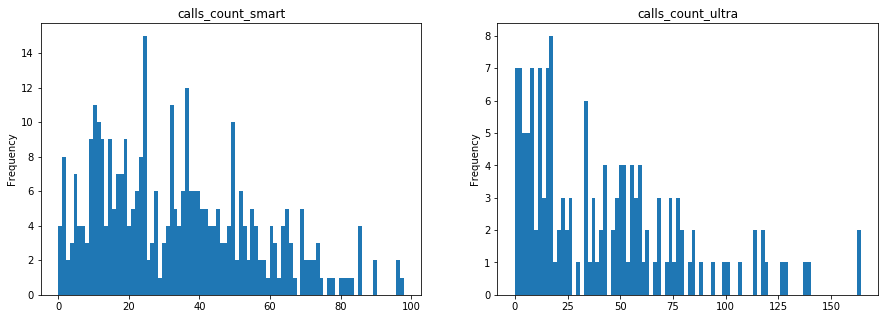

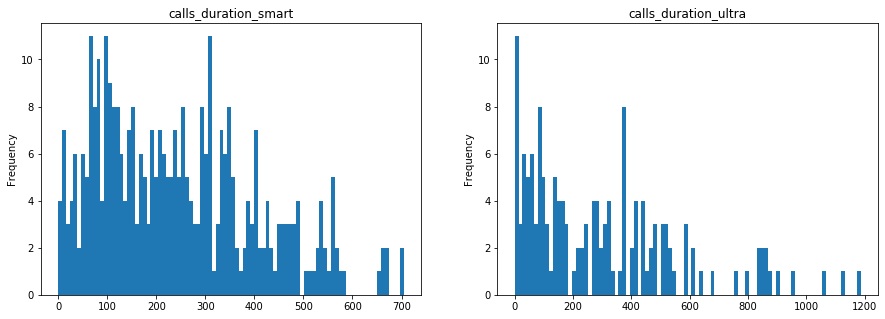

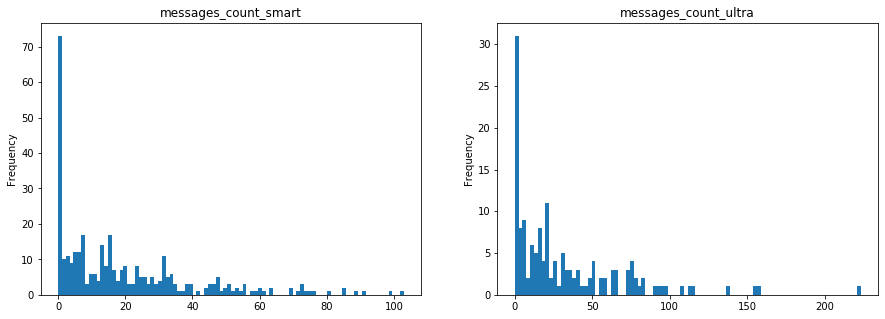

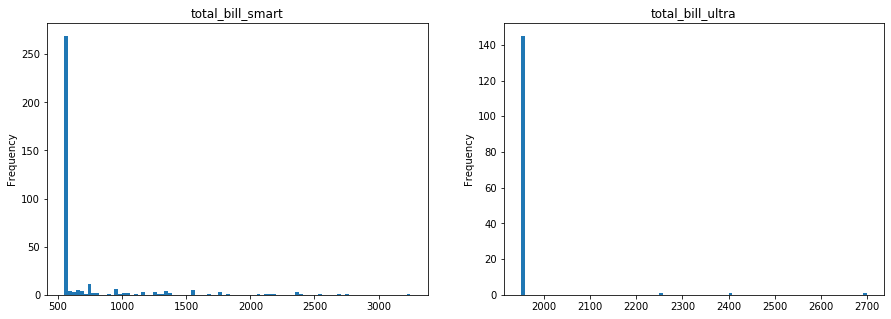

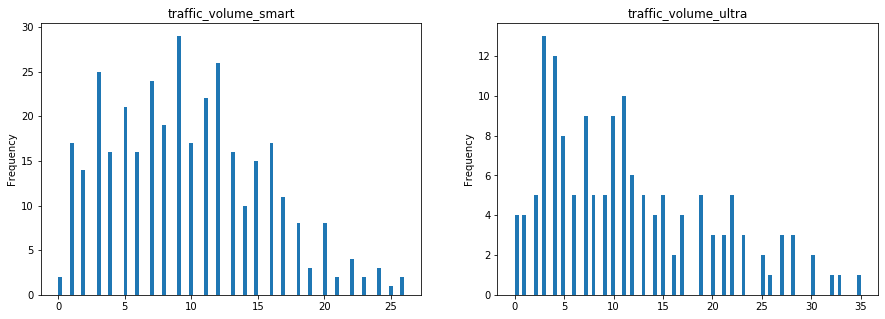

In [34]:
# visualising service consumption for each tariff
for i in cmiut_by_tariff.columns[1:]:
    fig, axs = plt.subplots(1,2)
    cmiut_by_tariff[cmiut_by_tariff.index == 'smart'][i].plot(bins = 90, kind = 'hist', title = i + '_smart', figsize = (15, 5), ax = axs[0])
    cmiut_by_tariff[cmiut_by_tariff.index == 'ultra'][i].plot(bins = 90, kind = 'hist', title = i + '_ultra', figsize = (15, 5), ax = axs[1])

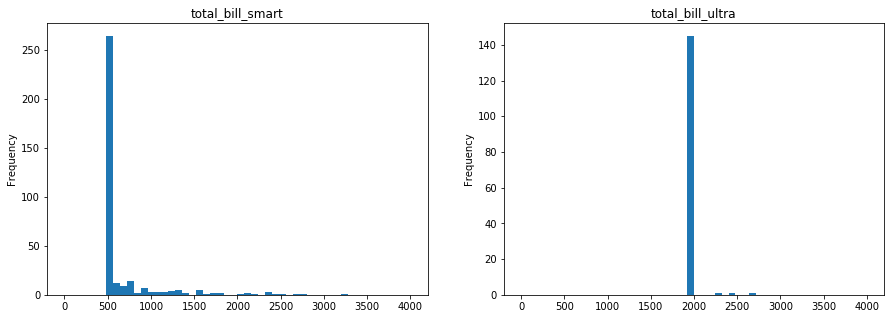

In [35]:
# checking total_bill in detail
for i in cmiut_by_tariff.columns[4:5]:
    fig, axs = plt.subplots(1,2)
    cmiut_by_tariff[cmiut_by_tariff.index == 'smart']['total_bill'].plot(bins = 50, kind = 'hist', title = i + '_smart', figsize = (15, 5), ax = axs[0], range = (0, 4000))
    cmiut_by_tariff[cmiut_by_tariff.index == 'ultra']['total_bill'].plot(bins = 50, kind = 'hist', title = i + '_ultra', figsize = (15, 5), ax = axs[1], range = (0, 4000))

All histograms are positively skewed. Due to the greater dispersion, ultra has longer tails than smart.

- Number of calls: smart has a main peak of 25, ultra - about 14.
- Minutes usage: smart has two peaks - 80 and 90 minutes, ultra - about 120. Moreover, smart and ultra have small peaks at near-zero values. In general, smart tariff customers talk no more than 600 minutes a year, whereas ultra customers talk almost 900 minutes.
- Messages usage: in both tariffs, many people use messages very little. This is the result of earlier replacing 85 missing values with zeros, which we observed earlier. In general, smart tariff customers send no more than 80 messages, whereas ultra customers send around 100 messages.
- Internet traffic usage: Both tariffs have an upper limit of 20-25 gb, after which there are few values. In smart, the peak is around 9 gb; in ultra, there are two peaks, one about 3 gb and the other about 4 gb.

Monthly spendings are mostly below the tariff plan fee, which is 550 for smart and 1950 for ultra. While some users of the smart tariff overspend their tariff limits and spend 3,000 a month. There are very few ultra tariff customers who exceed their monthly tariff limits and spend more than 2,700 a month.

**Conclusion**

On average, all parameters (minutes, messages, and traffic) grow between January and December.

Users of smart tariff use the operator's services more than users of ultra tariff. Smart tariff has a greater variance and standard deviation, except for the number of messages parameter.

All histograms are positively skewed. Due to the greater dispersion, ultra has longer tails than smart.

- Number of calls: smart has a main peak of 25, ultra - about 14.
- Minutes usage: smart has two peaks - 80 and 90 minutes, ultra - about 120. Moreover, smart and ultra have small peaks at near-zero values. In general, smart tariff customers talk no more than 600 minutes a year, whereas ultra customers talk almost 900 minutes.
- Messages usage: in both tariffs, many people use messages very little. This is the result of earlier replacing 85 missing values with zeros, which we observed earlier. In general, smart tariff customers send no more than 80 messages, whereas ultra customers send around 100 messages.
- Internet traffic usage: both tariffs have an upper limit of 20-25 gb, after which there are few values. In smart, the peak is around 9 gb; in ultra, there are two peaks, one about 3 gb and the other about 4 gb.

Monthly spendings are mostly below the tariff plan fee, which is 550 for smart and 1950 for ultra. While some users of the smart tariff overspend their tariff limits and spend 3,000 a month. There are very few ultra tariff customers who exceed their monthly tariff limits and spend more than 2,700 a month.

## Hypotheses testing

Test two hypotheses:
- The average user revenue for the "Ultra" and "Smart" tariffs is statistically different;
- Moscow's average user revenue differs from that of other regions.

**The average user revenue for the "Ultra" and "Smart" tariffs is statistically different**

Let's formulate the null and alternative hypotheses:
- H0: the average user revenue for the "Ultra" and "Smart" tariffs is statistically equal;
- H1: the average user revenue for the "Ultra" and "Smart" tariffs is statistically different.

I will use the scipy.stats.ttest_ind (array1, array2, equal_var) method to test the hypothesis that two populations have an equal mean.

In [37]:
# creating parameters
ultra_ttest = cmiut[cmiut['tariff'] == 'ultra']['total_bill']
smart_ttest = cmiut[cmiut['tariff'] == 'smart']['total_bill']

In [38]:
# comparing the sample variances using the Levene statistic test (for the equal_var parameter)
stat, p = levene(ultra_ttest, smart_ttest)
p

2.225636046987037e-05

A small p-significance level indicates that the variances are not equal.

In [39]:
# setting the significance level 
alpha = 0.05

results = st.ttest_ind(ultra_ttest, smart_ttest, equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We do not reject the null hypothesis")

p-value: 2.3220286584879468e-189
We reject the null hypothesis


P-value is less than the significance level of 5% => the average user revenue for the "Ultra" and "Smart" tariffs is statistically different.

**Moscow's average user revenue differs from that of other regions**

Let's formulate the null and alternative hypotheses:
- H0: Moscow's average user revenue is statistically equal to that of other regions;
- H1: Moscow's average user revenue is statistically different from that of other regions.

Our alternative hypothesis is two-sided, since Moscow's average user revenue may differ from other regions.

The scipy.stats.ttest_1samp(array, popmean) method is used to test two-sided hypothesis.

In [40]:
# creating a table with Moscow revenue
moscow_ttest = cmiut[cmiut['city'] == 'Москва']['total_bill']

# create a table with other regions revenue
popmean = cmiut[cmiut['city'] != 'Москва']['total_bill'].mean()

# setting the significance level
alpha = 0.05

results = st.ttest_1samp(moscow_ttest, popmean)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We do not reject the null hypothesis")

p-value: 0.6850350477169471
We do not reject the null hypothesis


P-value is 68%, which is above the significance level of 5% => Moscow's average user revenue is statistically equal to that of other regions.

**Conclusion**

- The average user revenue for the "Ultra" and "Smart" tariffs is statistically different;
- Moscow's average user revenue is statistically equal to that of other regions.

## Final conclusion

Users of smart tariff use the operator's services more than users of ultra tariff. Smart tariff has a greater variance and standard deviation, except for the number of messages parameter.

All histograms are positively skewed. Due to the greater dispersion, ultra has longer tails than smart.

- Number of calls: smart has a main peak of 25, ultra - about 14.
- Minutes usage: smart has two peaks - 80 and 90 minutes, ultra - about 120. Moreover, smart and ultra have small peaks at near-zero values. In general, smart tariff customers talk no more than 600 minutes a year, whereas ultra customers talk almost 900 minutes.
- Messages usage: in both tariffs, many people use messages very little. This is the result of earlier replacing 85 missing values with zeros, which we observed earlier. In general, smart tariff customers send no more than 80 messages, whereas ultra customers send around 100 messages.
- Internet traffic usage: both tariffs have an upper limit of 20-25 gb, after which there are few values. In smart, the peak is around 9 gb; in ultra, there are two peaks, one about 3 gb and the other about 4 gb.

Monthly spendings are mostly below the tariff plan fee, which is 550 for smart and 1950 for ultra. While some users of the smart tariff overspend their tariff limits and spend 3,000 a month. There are very few ultra tariff customers who exceed their monthly tariff limits and spend more than 2,700 a month.

After testing the hypotheses, it became clear that:

- The average user revenue for the "Ultra" and "Smart" tariffs is statistically different;
- Moscow's average user revenue is statistically equal to that of other regions.

It can be concluded that ultra tariff users spend more minutes on calls. On the other hand, smart tariff users use more internet traffic and often overspend their tariff limits which brings more profit to the business. 